In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

%matplotlib inline
# Global variables
BNB_LEMON = '#FFF44F'
BNB_ORANGE ='#FF4500'
BNB_GREEN = '#228B22'
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

In [2]:
df=pd.read_csv('C://Users//shahk//Downloads//listings_detail.csv', low_memory=False)

#### Print all the features

In [3]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [4]:
print(df.shape)

(44317, 96)


In [5]:
df['price'].value_counts()

$150.00      1881
$100.00      1832
$50.00       1443
$60.00       1397
$75.00       1321
$200.00      1306
$80.00       1233
$65.00       1141
$70.00       1122
$125.00      1016
$120.00      1013
$90.00        949
$250.00       901
$55.00        877
$85.00        846
$45.00        814
$99.00        754
$110.00       726
$95.00        713
$175.00       694
$40.00        652
$130.00       563
$140.00       499
$300.00       490
$180.00       476
$160.00       464
$115.00       451
$225.00       433
$199.00       384
$69.00        381
             ... 
$391.00         1
$3,200.00       1
$1,368.00       1
$767.00         1
$690.00         1
$489.00         1
$12.00          1
$851.00         1
$539.00         1
$348.00         1
$529.00         1
$5.00           1
$368.00         1
$830.00         1
$664.00         1
$514.00         1
$523.00         1
$388.00         1
$417.00         1
$504.00         1
$386.00         1
$1,548.00       1
$466.00         1
$392.00         1
$1,190.00 

In [6]:
print ('Number of entries: ', df.shape[0])

Number of entries:  44317


### Visualizing prices

In [7]:
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 10.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= BNB_GREEN, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars", fontsize=20)
        ax[i].set_ylabel("Frequency", fontsize=20)
    plt.tight_layout()
    plt.show()

In [8]:
#Visualize price table, changing them to floats and replacing the commas with a blank
#prices = df['price'].apply((lambda s: float(s[1:].replace(',',''))))
prices = df['price'].apply(lambda x:float(str(x).replace(',','').replace('$','')))

C:\Users\shahk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


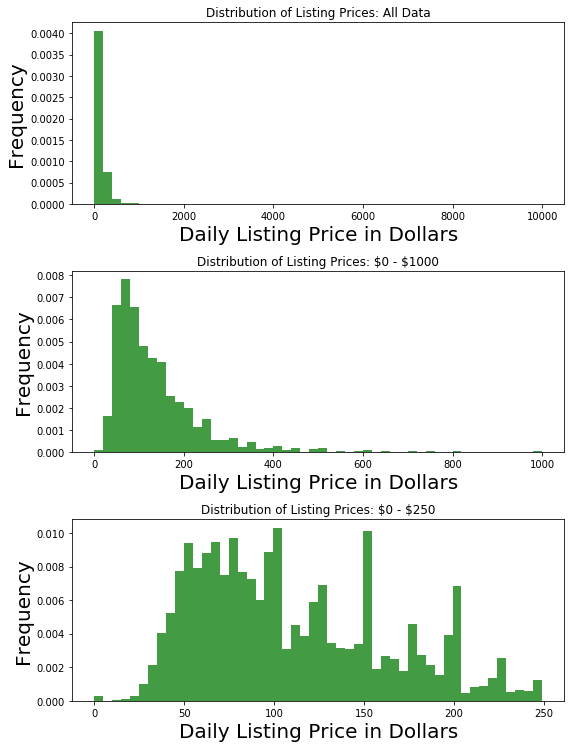

In [9]:
plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$250'], [prices, prices[prices <= 1000], prices[prices < 250]])

In [10]:
# Get frequency of bedroom number for listings
bedrooms_counts = Counter(df.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 27392) * 100

In [11]:
# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

#### Plot the percentage of listings by bedroom number

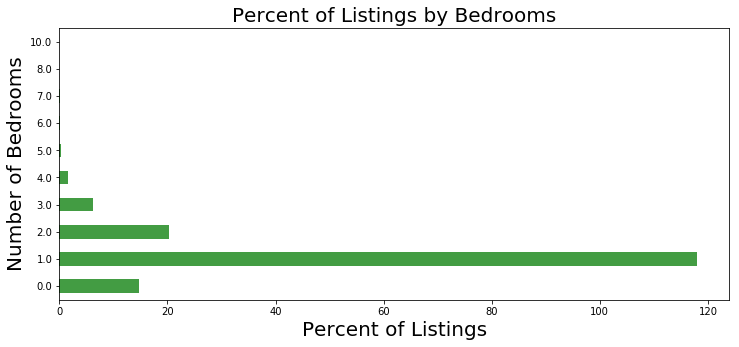

Percent of 1 Bedroom Listings: %117.99


In [12]:
# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'barh', figsize = (12, 5), color = BNB_GREEN, alpha = 0.85)
ax.set_xlabel("Percent of Listings", fontsize=20)
ax.set_ylabel("Number of Bedrooms", fontsize=20)
ax.set_title('Percent of Listings by Bedrooms', fontsize=20)
ax.legend_.remove()

plt.show()

print ("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))

#### Plot listings on scatterplot by using Latitude and Longitude

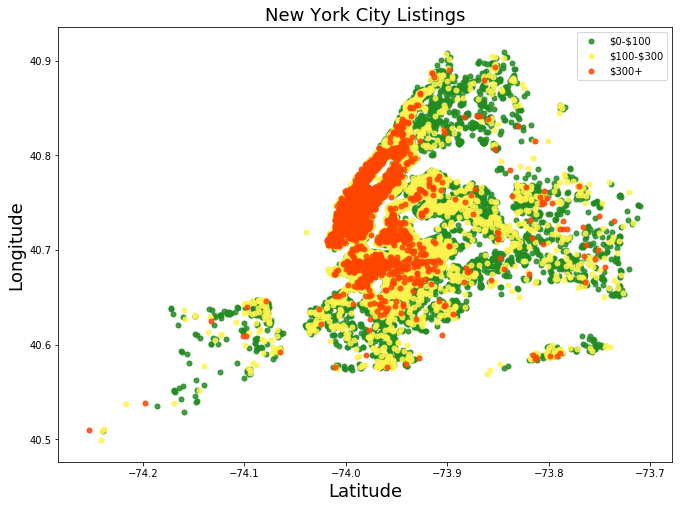

In [13]:
# Outline price buckets
intervals = [0,100,300, 10000] 
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(df[(prices > intervals[i]) & (prices < intervals[i+1])])

colors = [BNB_GREEN, BNB_LEMON, BNB_ORANGE]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(11,8))
for i in range(0, len(buckets)):
     plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('New York City Listings', fontsize=18)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.legend(labels=leg_labels, loc = 'best')
#plt.xlim(-74.2,-73.7)
#plt.ylim(40.45,40.95)

plt.show()

#### Plot emptiness graph

In [14]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

In [15]:
# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))


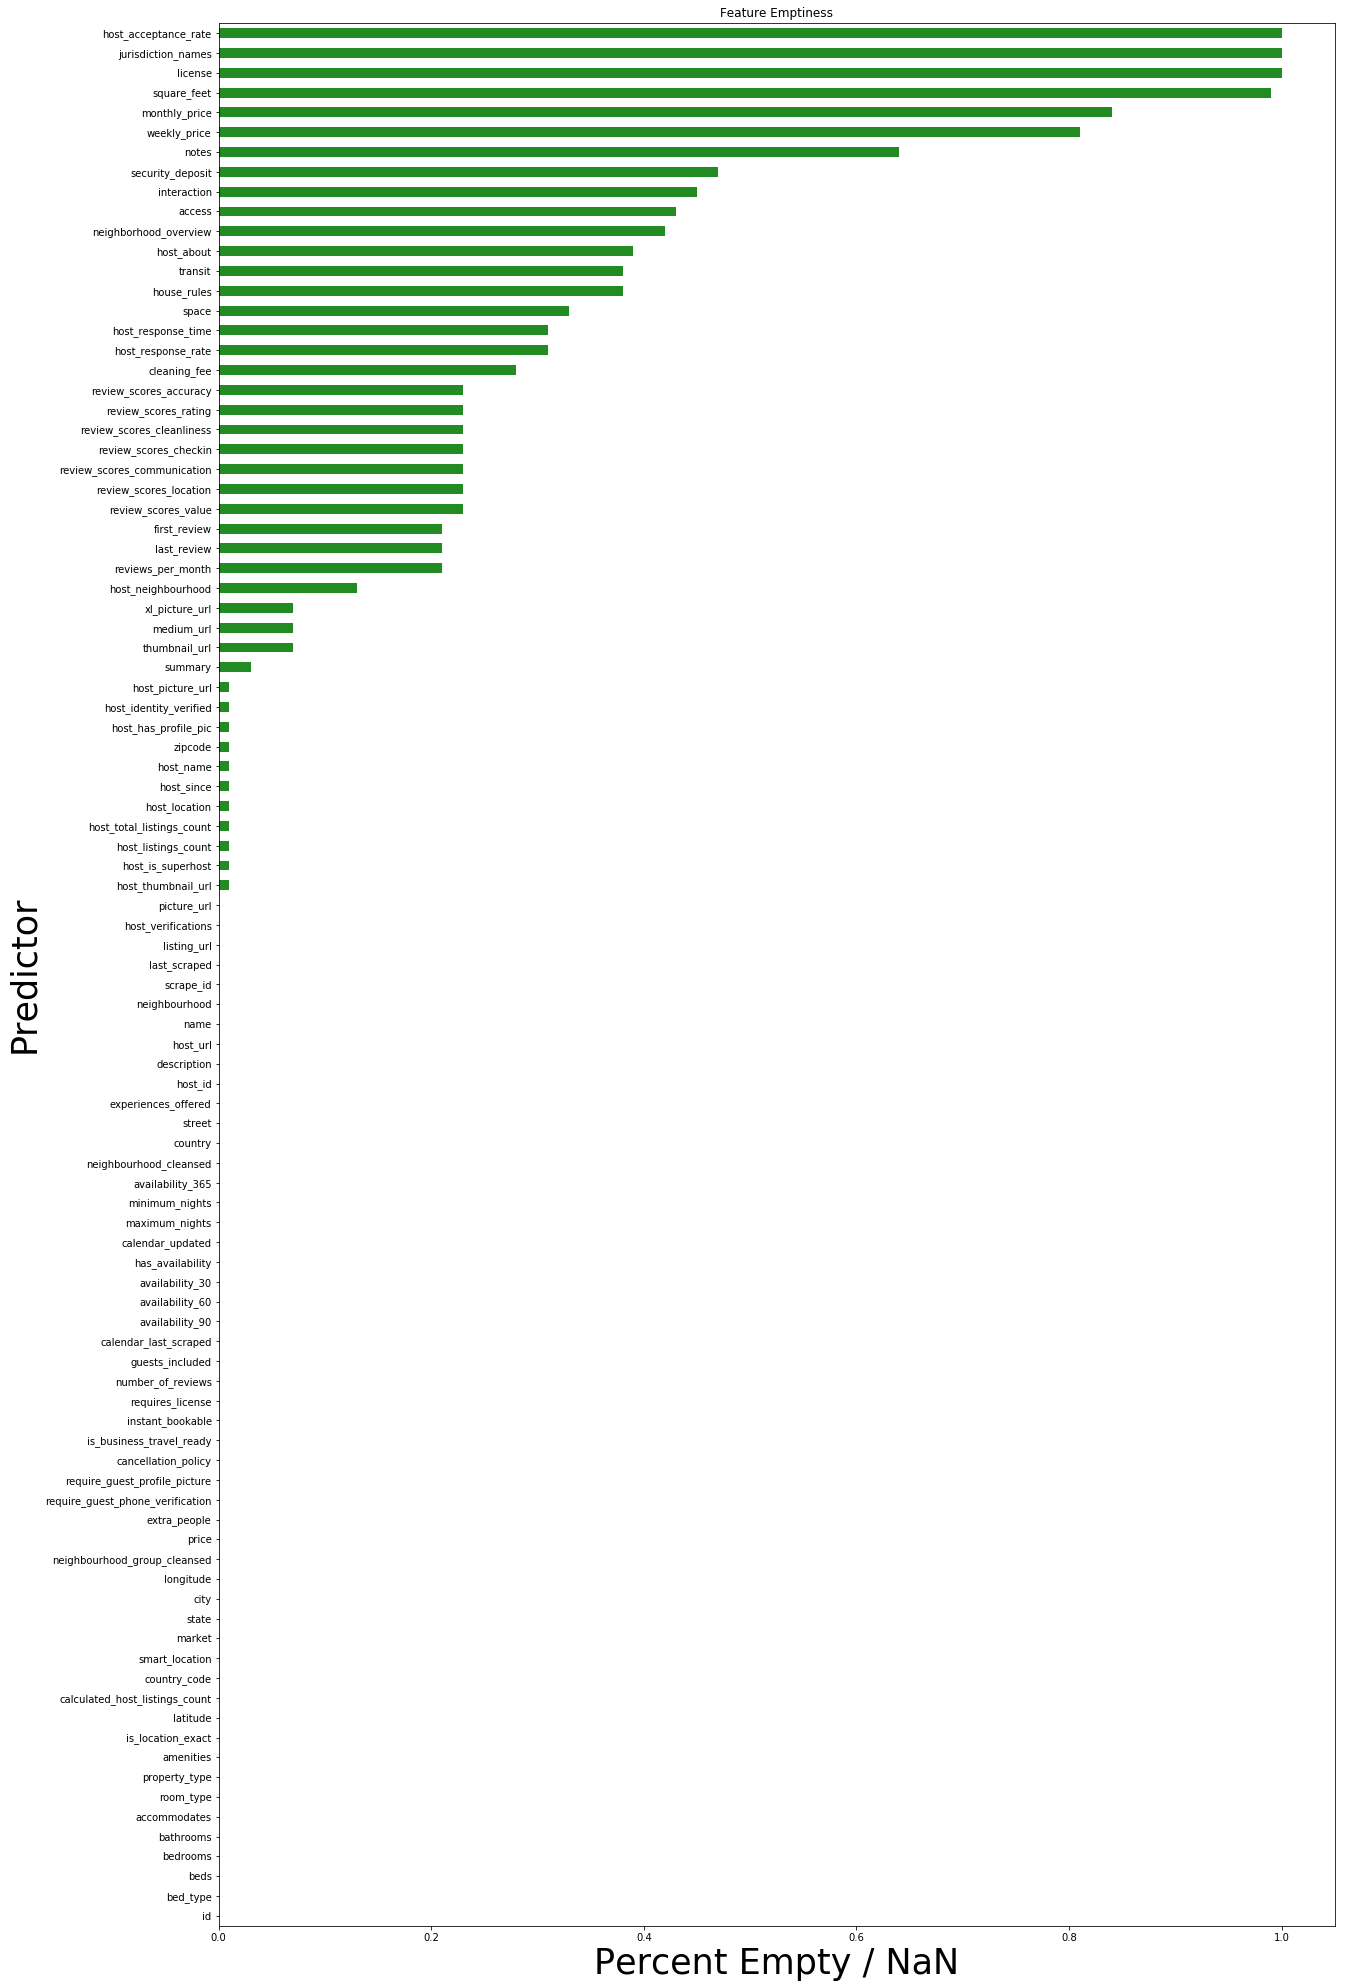

In [16]:
# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'barh', color = BNB_GREEN, figsize = (20, 35))
ax.set_xlabel('Percent Empty / NaN', fontsize = 35)
ax.set_ylabel('Predictor', fontsize = 35)
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

### Defining a function to convert "categorical" feature to "numerical" feature


In [17]:
print(df['amenities'].head())

0    {TV,"Wireless Internet","Air conditioning",Kit...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,Internet,"Wireless Internet","Air conditio...
3                                                   {}
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object


In [ ]:
y=0
for x in df['amenities']:
    if 'TV' in x:
        df.loc[y,'tv']='1'
        y+=1
    else:
        df.loc[y,'tv']='0'
        y+=1

In [ ]:

y=0
for x in df['amenities']:
    if 'Wireless Internet' in x:
        df.loc[y,'Wireless_Internet']='1'
        y+=1
    else:
        df.loc[y,'Wireless_Internet']='0'
        y+=1

In [ ]:
y=0
for x in df['amenities']:
    if 'Free parking on premises' in x:
        df.loc[y,'Parking']='1'
        y+=1
    else:
        df.loc[y,'Parking']='0'
        y+=1

In [ ]:
y=0
for x in df['amenities']:
    if 'Pool' in x:
        df.loc[y,'Pool']='1'
        y+=1
    else:
        df.loc[y,'Pool']='0'
        y+=1

In [ ]:
y=0
for x in df['amenities']:
    if 'Kitchen' in x:
        df.loc[y,'Kitchen']='1'
        y+=1
    else:
        df.loc[y,'Kitchen']='0'
        y+=1

In [ ]:
pd.to_numeric(df.tv)
pd.to_numeric(df.Wireless_Internet)
pd.to_numeric(df.Parking)
pd.to_numeric(df.Pool)
pd.to_numeric(df.Kitchen)

In [ ]:
df['Pool'] = df['Pool'].astype(float)
df['Parking'] = df['Parking'].astype(float)
df['Kitchen'] = df['Kitchen'].astype(float)
df['Wireless_Internet'] = df['Wireless_Internet'].astype(float)
df['tv'] = df['tv'].astype(float)

In [ ]:
df['extra_people']=df['extra_people'].apply(lambda x: x.replace('$',''))
df['extra_people']=df['extra_people'].apply(lambda x:x.replace(',',''))
df['extra_people'] = df['extra_people'].astype(float)

In [ ]:
df['price']=df['price'].apply(lambda x: x.replace('$',''))
df['price']=df['price'].apply(lambda x:x.replace(',',''))
df['price']=df['price'].astype(float)

In [ ]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet'] 
featured_matrix=df[feature_cols]

In [ ]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet'] 

In [ ]:
featured_matrix.bathrooms.fillna(1).head()

In [ ]:
featured_matrix['bedrooms'].fillna(1).head()

#### Filtering the dataset

In [ ]:
label_vector =df[df['price']<=500]
featured_matrix=df[df['price']<=500]

In [ ]:
df1 =df[(df.price<=500)]


In [ ]:
featured_matrix = df1[feature_cols]


In [ ]:
label_vector= df1['price']

In [ ]:
featured_matrix.shape

In [ ]:
featured_matrix[featured_matrix['bathrooms'].isnull()].head()

In [ ]:
featured_matrix.bathrooms=featured_matrix.bathrooms.fillna(1)

In [ ]:
featured_matrix.beds=featured_matrix.beds.fillna(1)

In [ ]:
featured_matrix.bedrooms=featured_matrix.bedrooms.fillna(1)

In [ ]:
X = featured_matrix
y=label_vector

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#new = new.convert_objects(convert_numeric=True)
sns.set(font_scale=2.2)
str_list = []
for colname, colvalue in featured_matrix.iteritems():
    if type(colvalue)==str:
        str_list.append(colname)

num_list = featured_matrix.columns.difference(str_list)

house_num = featured_matrix[num_list]

f,ax = plt.subplots(figsize = (35,30))

plt.title('Feature Correlations', fontsize = 25)


sns.heatmap(house_num.astype(float).corr(),linewidths=2.0,vmax=1.0, square = False,
            cmap = 'BuPu',linecolor = 'G', annot = True)

plt.show()

## Step3: Defining (instantiating) an "object" from the sklearn class:
#### Splitting the Dataset:

In [ ]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(featured_matrix, label_vector, test_size=0.2, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

# ANN Regression
#### Defining (instantiating) an "object" from the sklearn class "MLPRegressor" (Multi-layer Perceptron (MLP)):

In [ ]:
# "my_ANN" is instantiated as an "object" of MLPRegressor "class". 

my_ANN = MLPRegressor(hidden_layer_sizes=(6,4,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
    random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#### Training Stage: Training a predictive model using the training dataset:


In [ ]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


In [ ]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [ ]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

### Accuracy Evaluation:


In [ ]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_ann)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

# Random Forest Regressor
#### Defining (instantiating) an "object" from the sklearn class "RandomForestRegressor":

In [ ]:
my_RF = RandomForestRegressor(n_estimators = 19, bootstrap = True, random_state=2)

#### Training Stage: Training a predictive model using the training dataset:


In [ ]:
# Training ONLY on the training set:
my_RF.fit(X_train, y_train)

In [ ]:
# Testing on the testing set:

y_predict_RF = my_RF.predict(X_test)

print(y_predict_RF)

### Accuracy Evaluation:


In [ ]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_RF)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

# Linear Regression
#### Defining (instantiating) an "object" from the sklearn class "LinearRegression":

In [ ]:
my_linear = LinearRegression()
my_linear.fit(featured_matrix, label_vector)

In [ ]:
print(my_linear.intercept_)

print(my_linear.coef_)
coef_list = my_linear.coef_

print(coef_list)

In [ ]:
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

In [ ]:

y_predict_ln = my_linear.predict(X_test)
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(y_test, y_predict_ln, edgecolors=(0,1,1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Accuracy Evaluation:


In [ ]:
from sklearn import metrics

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

# Polynomial Regressor
#### Defining (instantiating) an "object" from the sklearn class "PolynomialRegressor":

In [ ]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_predict_poly = poly_lin_reg.predict(X_test_poly)
print(y_predict_poly)

In [ ]:
z = np.polyfit(y_test,y_predict_poly,10) 

p = np.poly1d(z)

plt.title ('Polynomial Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'], fontsize = 12)
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'],
            fontsize = 12)

#plt.plot(y_test[:100], y_predict_poly[:100],'o-')
#plt.plot(y_test[:5], y_predict_poly[:5], '-')

datax_os = np.linspace(y_test.min(), y_test.max(), 50 )
#plt.figure(figsize=(18,18))
plt.plot(y_test, y_predict_poly, 'o',datax_os, p(datax_os)) # 'smoother' line

plt.show()

### Accuracy Evaluation:


In [ ]:
from sklearn import metrics

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

# Logistic Regression
#### Defining (instantiating) an "object" from the sklearn class "LogisticRegression":

In [ ]:
my_logreg = LogisticRegression()


In [ ]:
my_logreg.fit(X, y)

In [ ]:
y_predict_log = my_logreg.predict(X_test)

print(y_predict_log)

### Accuracy Evaluation:


In [ ]:
from sklearn import metrics

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

#  
#  Finding the best  features
#  

In [ ]:
from sklearn.metrics import matthews_corrcoef


In [ ]:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet']

In [ ]:
a = []
for f in feature_cols:
    a.append(np.abs(np.corrcoef(X[f],y)[1,0]))
        
a.sort()
print(a)

In [ ]:
count = 1
for f in feature_cols:
    if np.abs(np.corrcoef(X[f],y)[1,0]):
        #print(f)
        print(count , '-' , f  , '=' ,  np.abs(np.corrcoef(X[f],y)[1,0]))
        count = count + 1